# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create Map
map = -1*np.ones((10, 10))
map[0, :] = -10
map[9, :] = -10
map[:, 0] = -10
map[:, 9] = -10
map[9-2, 3:9-2] = -10
map[2:2+4, 4] = -10
map[2, 5] = -10
map[4:6, 7] = -10
map[8, 8] = 10
map[-3:-1, -3] = -2
map[-3, -2] = -2


In [3]:
# Action legend 0:up, 1:down, 2:left, 3:right
actions = {'up': 0, 'down': 1, 'left': 2, 'right': 3, 'nothing': 4}

In [4]:
def plot_im(data):
    fig = plt.figure()
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.grid(which='major', axis='both',
             linestyle='-', color='gray', linewidth=2)
    plt.xticks(np.arange(-0.5, 10, 1))
    plt.yticks(np.arange(-0.5, 10, 1))
    # Annotate cell values
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f'{data[i, j]:.2f}',
                     ha='center', va='center', color='grey')
    plt.colorbar()
    plt.show()


def plot_policy(map, policy):
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(map, cmap='viridis', interpolation='nearest')
    plt.grid(which='major', axis='both',
             linestyle='-', color='gray', linewidth=2)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            if policy[i, j] == actions['up']:
                plt.arrow(j, i, 0, -0.3, head_width=0.05,
                          head_length=0.05, fc='gray', ec='gray')
            elif policy[i, j] == actions['down']:
                plt.arrow(j, i, 0, 0.3, head_width=0.05,
                          head_length=0.05, fc='grey', ec='grey')
            elif policy[i, j] == actions['left']:
                plt.arrow(j, i, -0.3, 0, head_width=0.05,
                          head_length=0.05, fc='grey', ec='grey')
            elif policy[i, j] == actions['right']:
                plt.arrow(j, i, 0.3, 0, head_width=0.05,
                          head_length=0.05, fc='grey', ec='grey')
    # Annotate cell values
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            plt.text(j - 0.5 + 0.1, i + 0.5 - 0.1,
                     f'{map[i, j]:.2f}', ha='left', va='bottom', color='k')
    plt.xticks(np.arange(-0.5, 10, 1))
    plt.yticks(np.arange(-0.5, 10, 1))
    plt.show()


def plot_policy_png(map, policy, title, fname):
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(map, cmap='viridis', interpolation='nearest')
    plt.grid(which='major', axis='both',
             linestyle='-', color='gray', linewidth=2)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            if policy[i, j] == actions['up']:
                plt.arrow(j, i, 0, -0.3, head_width=0.05,
                          head_length=0.05, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['down']:
                plt.arrow(j, i, 0, 0.3, head_width=0.05,
                          head_length=0.05, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['left']:
                plt.arrow(j, i, -0.3, 0, head_width=0.05,
                          head_length=0.05, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['right']:
                plt.arrow(j, i, 0.3, 0, head_width=0.05,
                          head_length=0.05, fc='yellow', ec='yellow')
    # Annotate cell values
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            plt.text(j - 0.5 + 0.1, i + 0.5 - 0.1,
                     f'{map[i, j]:.2f}', ha='left', va='bottom', color='white')
    plt.xticks(np.arange(-0.5, 10, 1))
    plt.yticks(np.arange(-0.5, 10, 1))
    plt.title(title)
    plt.savefig(fname)


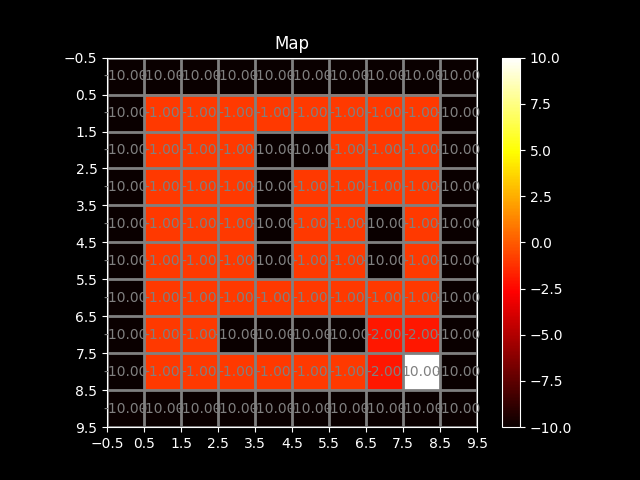

In [5]:
%matplotlib widget
data = map
fig = plt.figure()
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.grid(which='major', axis='both',
          linestyle='-', color='gray', linewidth=2)
plt.xticks(np.arange(-0.5, 10, 1))
plt.yticks(np.arange(-0.5, 10, 1))
# Annotate cell values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f'{data[i, j]:.2f}',
                    ha='center', va='center', color='grey')
plt.colorbar()
plt.title("Map")
plt.show()


In [6]:
def get_transition_matrix(policy):
    T = np.zeros((policy.shape[0]*policy.shape[1],
                 policy.shape[0]*policy.shape[1]), dtype=np.float32)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            if policy[i, j] == actions['up']:
                if i == 0:
                    T[i*policy.shape[1]+j, i*policy.shape[1]*j] = 1
                else:
                    T[i*policy.shape[1]+j, i*policy.shape[1] +
                        j+1] = 0.1  # Going right
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j-1] = 0.1  # Going left
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j] = 0.1  # Staying put
                    T[i*policy.shape[1]+j, (i-1)*policy.shape[1]+j] = 0.7
            elif policy[i, j] == actions['down']:
                if i == policy.shape[0]-1:
                    T[i*policy.shape[1]+j, i*policy.shape[1]*j] = 1
                else:
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j+1] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j-1] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, (i+1)*policy.shape[1]+j] = 0.7
            elif policy[i, j] == actions['left']:
                if j == 0:
                    T[i*policy.shape[1]+j, i*policy.shape[1]*j] = 1
                else:
                    T[i*policy.shape[1]+j, (i-1)*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, (i+1)*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j-1] = 0.7
            elif policy[i, j] == actions['right']:
                if j == policy.shape[1]-1:
                    T[i*policy.shape[1]+j, i*policy.shape[1]*j] = 1
                else:
                    T[i*policy.shape[1]+j, (i-1)*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, (i+1)*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j] = 0.1
                    T[i*policy.shape[1]+j, i*policy.shape[1]+j+1] = 0.7
            else:
                T[i*policy.shape[1]+j, i*policy.shape[1]+j] = 1
    # Check T matrix is correct
    if np.sum(T, axis=1).any() != 1:
        print('Error in T matrix')
    return T


In [7]:
def get_cost_matrix(map, policy):
    cost = np.zeros_like(map, dtype=np.float32)
    for i in range(cost.shape[0]):
        for j in range(cost.shape[1]):
            cost[i, j] = -1
            if policy[i, j] == actions['up']:
                if map[i-1, j] == -10:
                    cost[i, j] = -10
            elif policy[i, j] == actions['down']:
                if map[i+1, j] == -10:
                    cost[i, j] = -10
            elif policy[i, j] == actions['left']:
                if map[i, j-1] == -10:
                    cost[i, j] = -10
            elif policy[i, j] == actions['right']:
                if map[i, j+1] == -10:
                    cost[i, j] = -10
            # if policy[i,j] == actions['nothing']:
            else:
                cost[i, j] = 0
    cost[map == -10] = -10
    cost[map == 10] = 1000
    return cost


In [8]:
def get_hardcoded_policy(direction, map, actions):
    policy = np.ones((10, 10))*actions[direction]
    policy[map == -10] = actions['nothing']
    policy[map == 10] = actions['nothing']
    return policy


P_up = get_hardcoded_policy('up', map, actions)
P_down = get_hardcoded_policy('down', map, actions)
P_left = get_hardcoded_policy('left', map, actions)
P_right = get_hardcoded_policy('right', map, actions)
P_nothing = get_hardcoded_policy('nothing', map, actions)

T_up = get_transition_matrix(get_hardcoded_policy('up', map, actions))
T_down = get_transition_matrix(get_hardcoded_policy('down', map, actions))
T_left = get_transition_matrix(get_hardcoded_policy('left', map, actions))
T_right = get_transition_matrix(get_hardcoded_policy('right', map, actions))
T_nothing = get_transition_matrix(
    get_hardcoded_policy('nothing', map, actions))

C_up = get_cost_matrix(map, P_up)
C_down = get_cost_matrix(map, P_down)
C_left = get_cost_matrix(map, P_left)
C_right = get_cost_matrix(map, P_right)
C_nothing = get_cost_matrix(map, P_nothing)


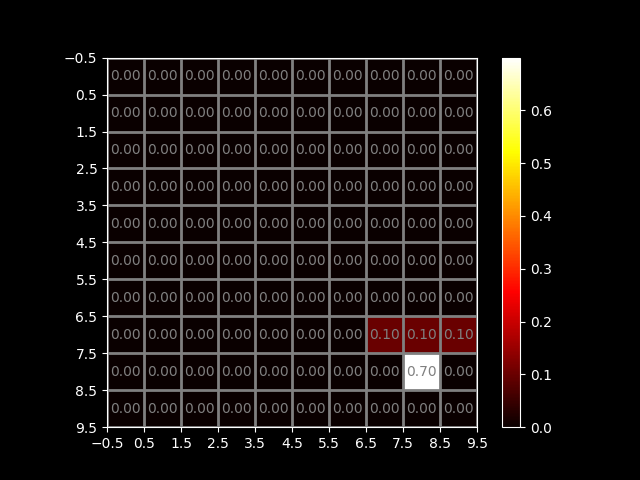

In [9]:
# Plotting transition matrix for a state and action
x, y = (7, 8)
plot_im(T_down[x*10+y].reshape(10, 10))


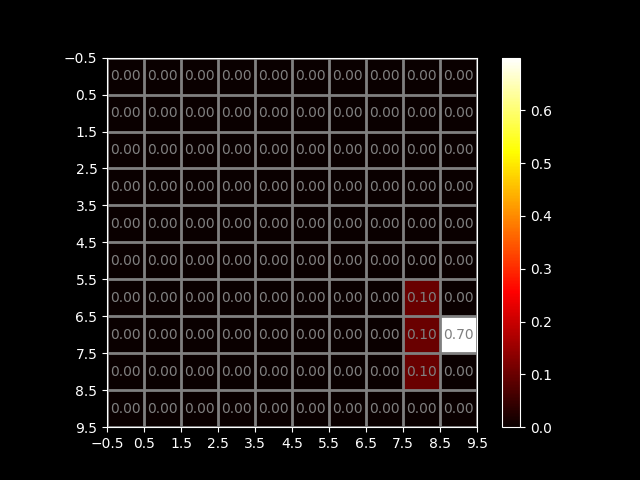

In [10]:
x, y = (7, 8)
plot_im(T_right[x*10+y].reshape(10, 10))

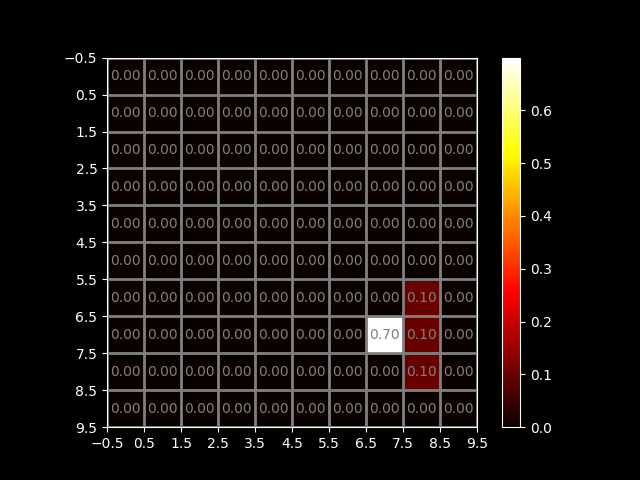

In [11]:
x, y = (7, 8)
plot_im(T_left[x*10+y].reshape(10, 10))

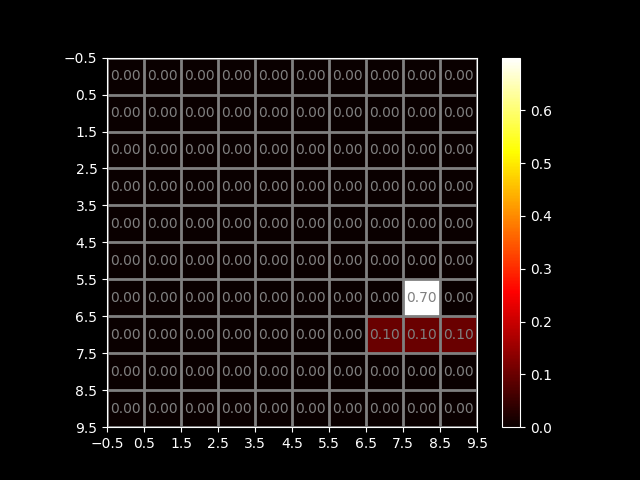

In [12]:
x, y = (7, 8)
plot_im(T_up[x*10+y].reshape(10, 10))

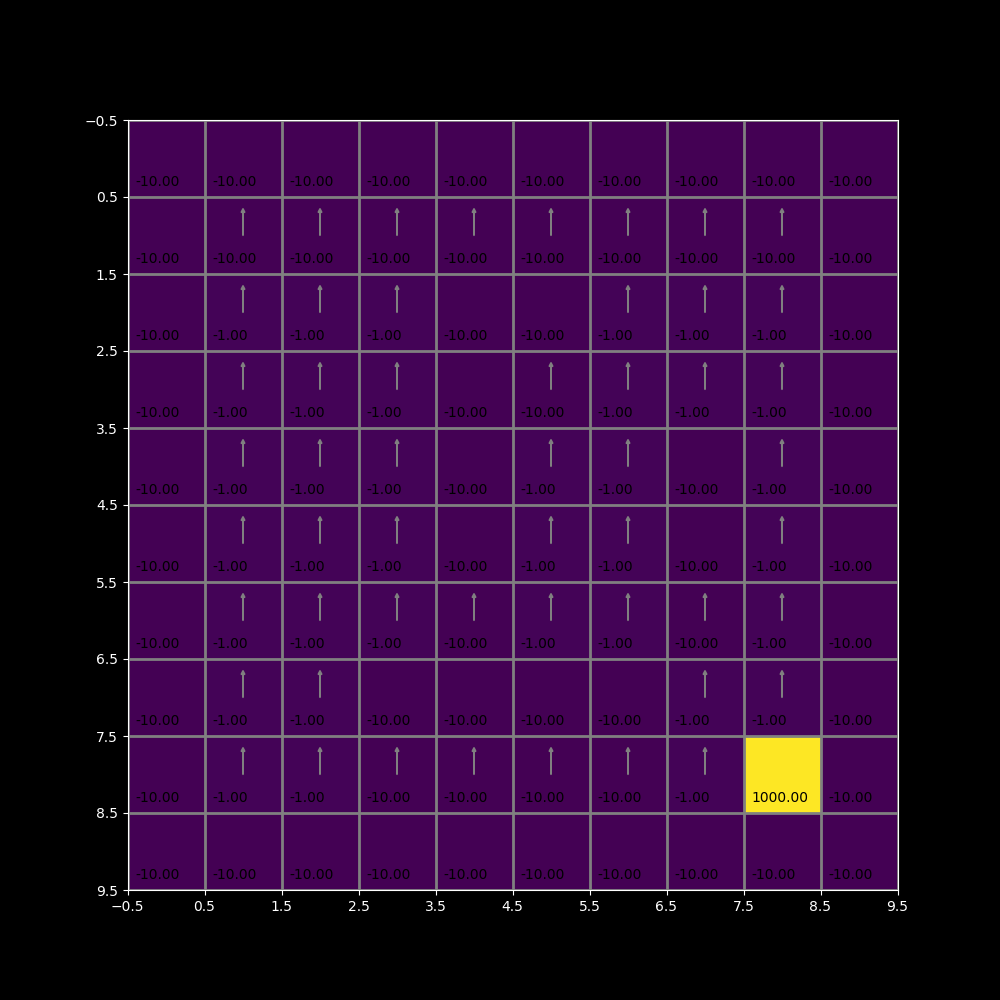

In [13]:
plot_policy(get_cost_matrix(map, P_up), P_up)


In [14]:
from copy import deepcopy


In [15]:
def plot_policy_png2(map, policy, title, fname, arrow_size=0.1, title_fontsize=20):
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(map, cmap='viridis', interpolation='nearest')
    plt.grid(which='major', axis='both',
             linestyle='-', color='gray', linewidth=2)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            if policy[i, j] == actions['up']:
                plt.arrow(j, i, 0, -0.3, head_width=arrow_size,
                          head_length=arrow_size*1.5, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['down']:
                plt.arrow(j, i, 0, 0.35, head_width=arrow_size,
                          head_length=arrow_size*1.5, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['left']:
                plt.arrow(j, i, -0.3, 0, head_width=arrow_size,
                          head_length=arrow_size*1.5, fc='yellow', ec='yellow')
            elif policy[i, j] == actions['right']:
                plt.arrow(j, i, 0.3, 0, head_width=arrow_size,
                          head_length=arrow_size*1.5, fc='yellow', ec='yellow')
    # Annotate cell values
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            plt.text(j - 0.5 + 0.1, i + 0.5 - 0.1,
                     f'{map[i,j]:.2f}', ha='left', va='center', color='white')
    plt.xticks(np.arange(-0.5, 10, 1))
    plt.yticks(np.arange(-0.5, 10, 1))
    plt.title(title, fontsize=title_fontsize)
    plt.savefig(fname)

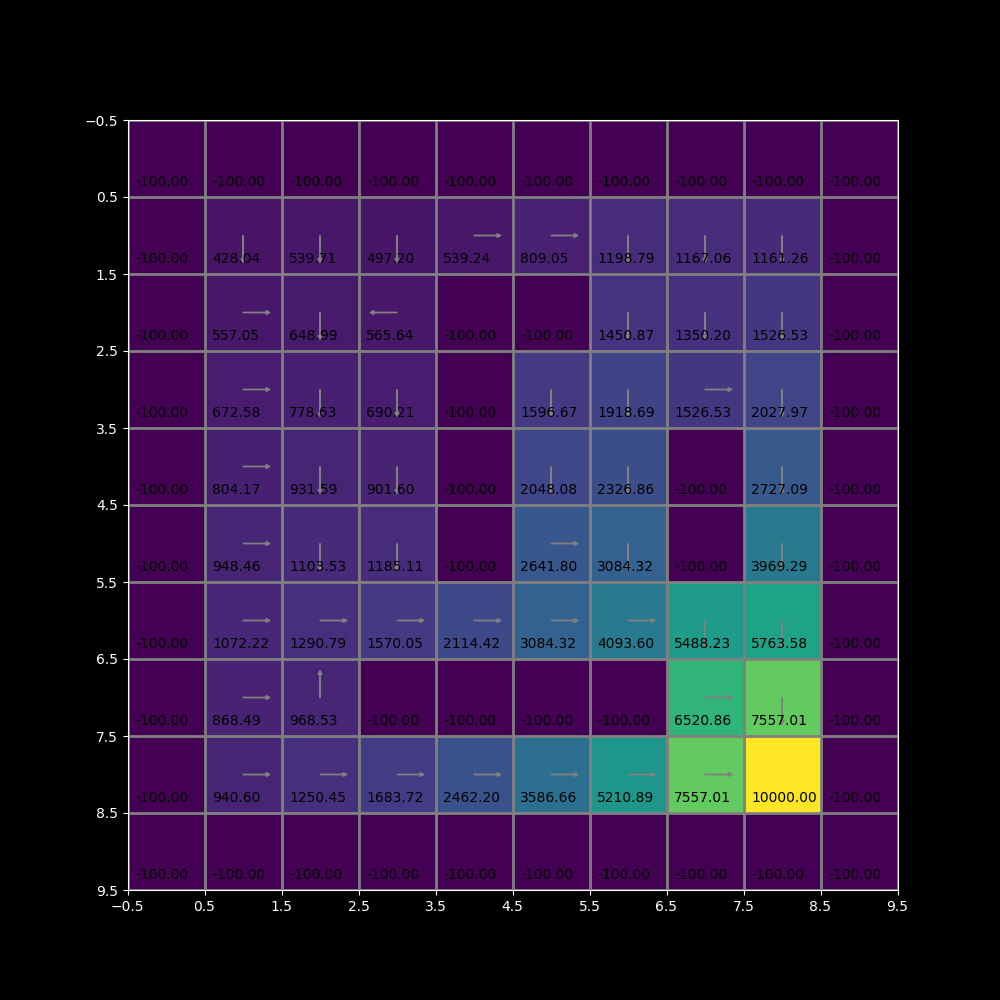

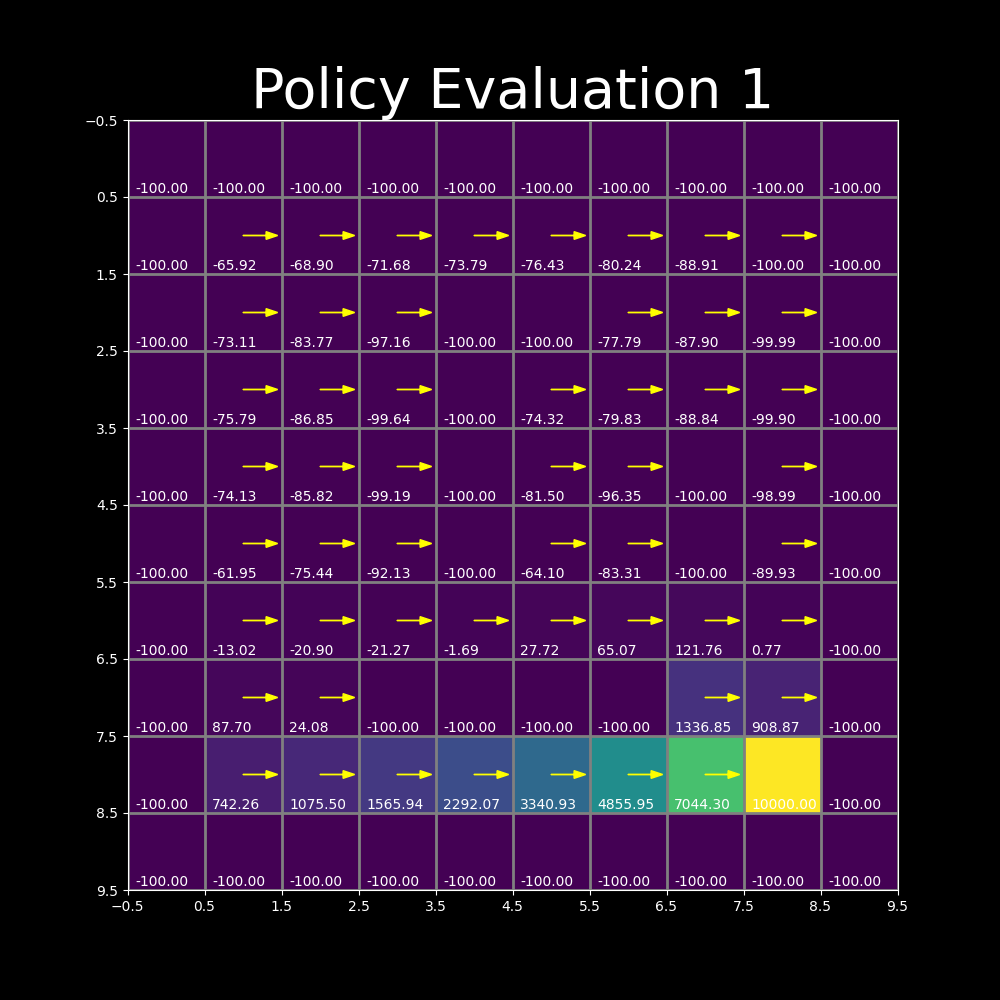

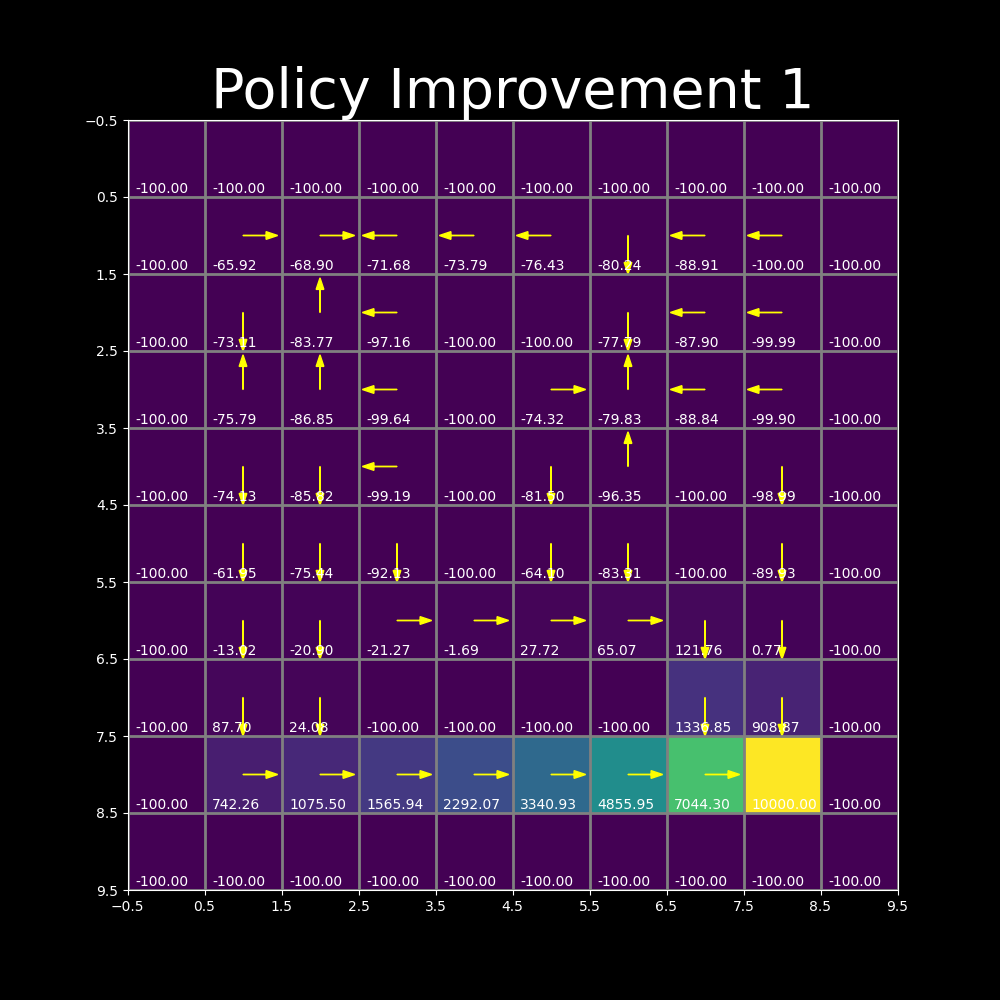

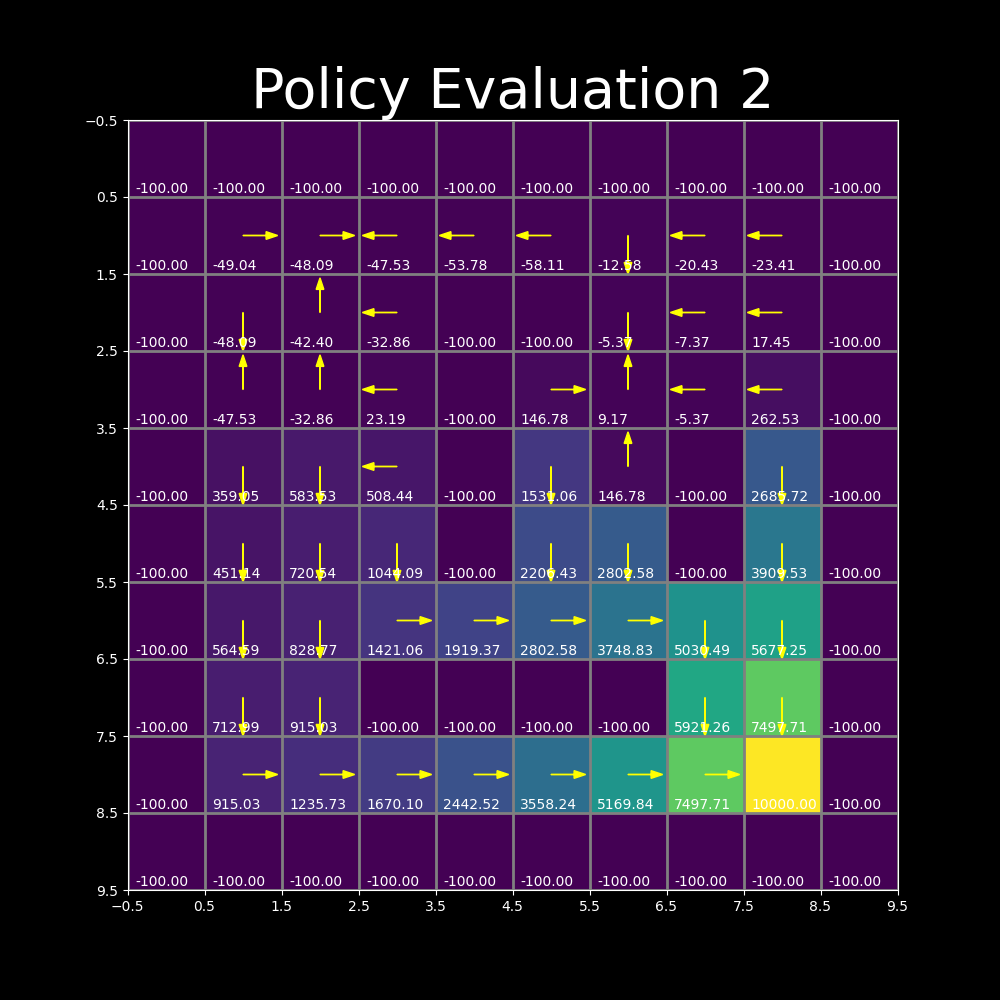

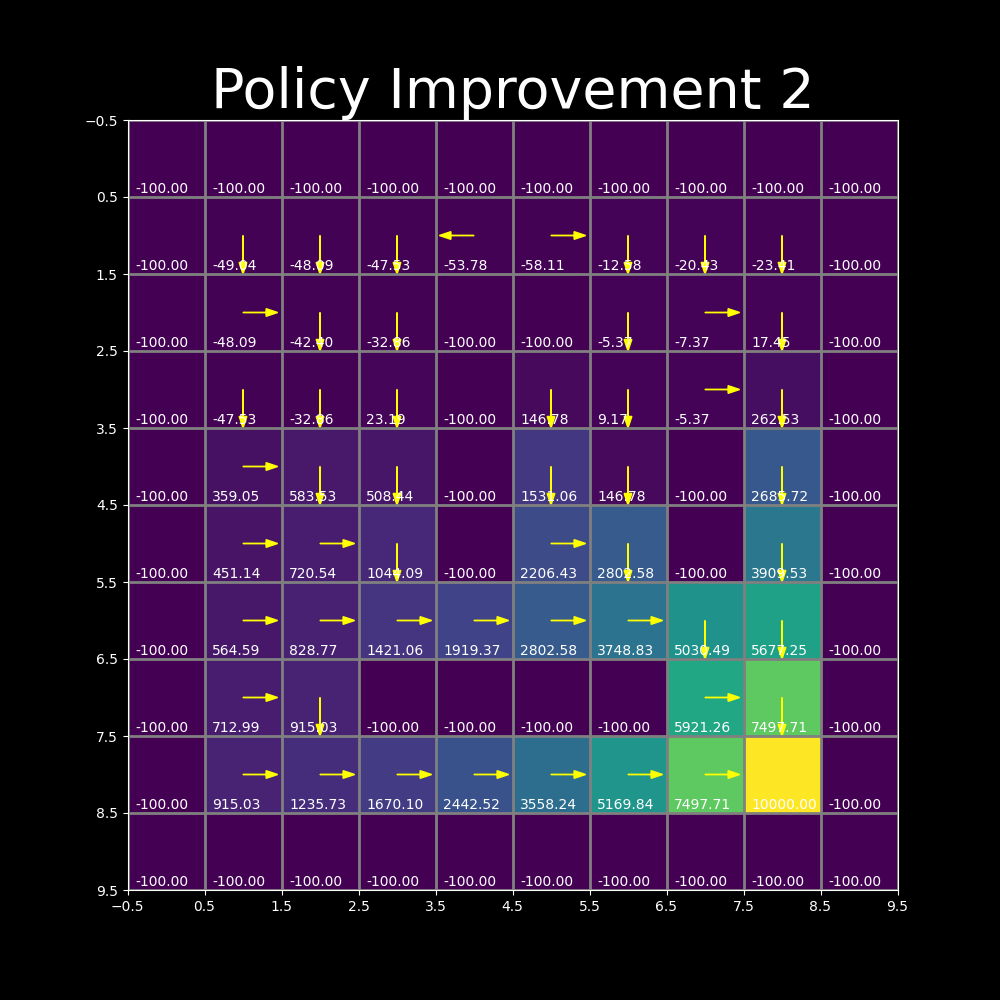

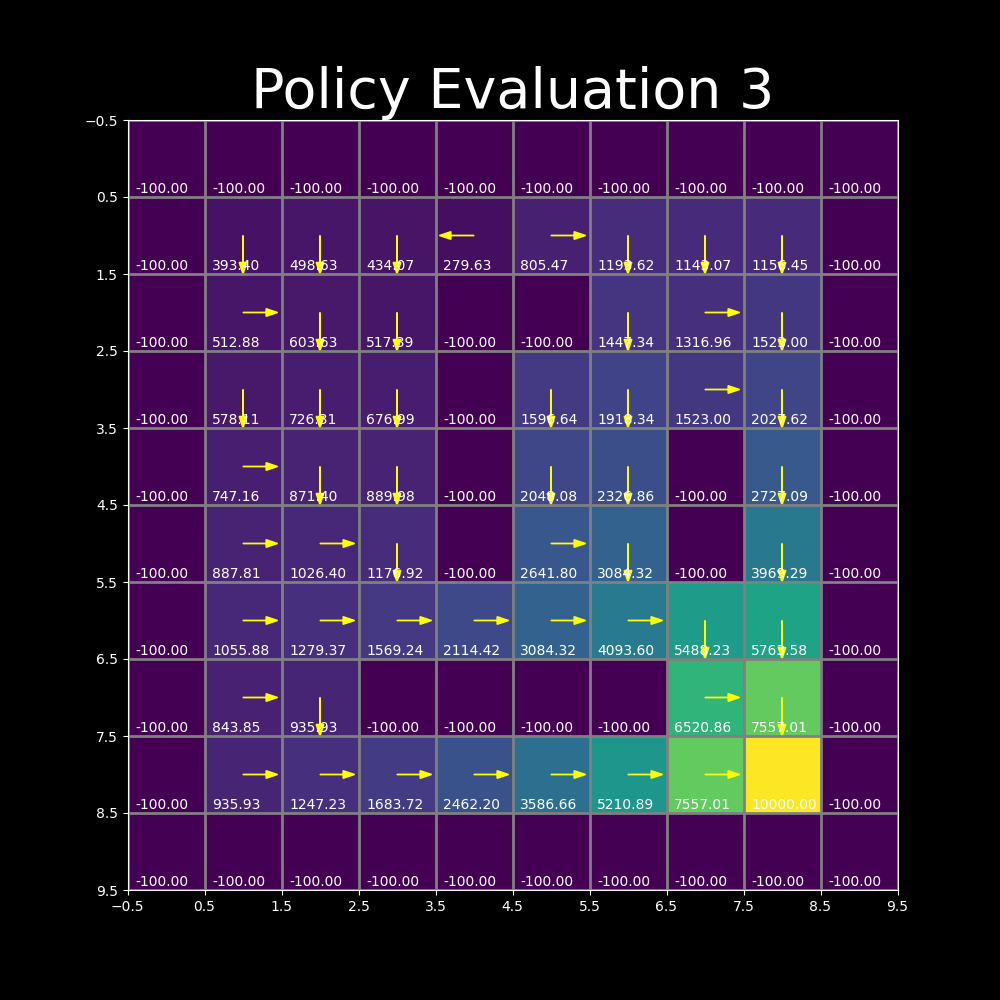

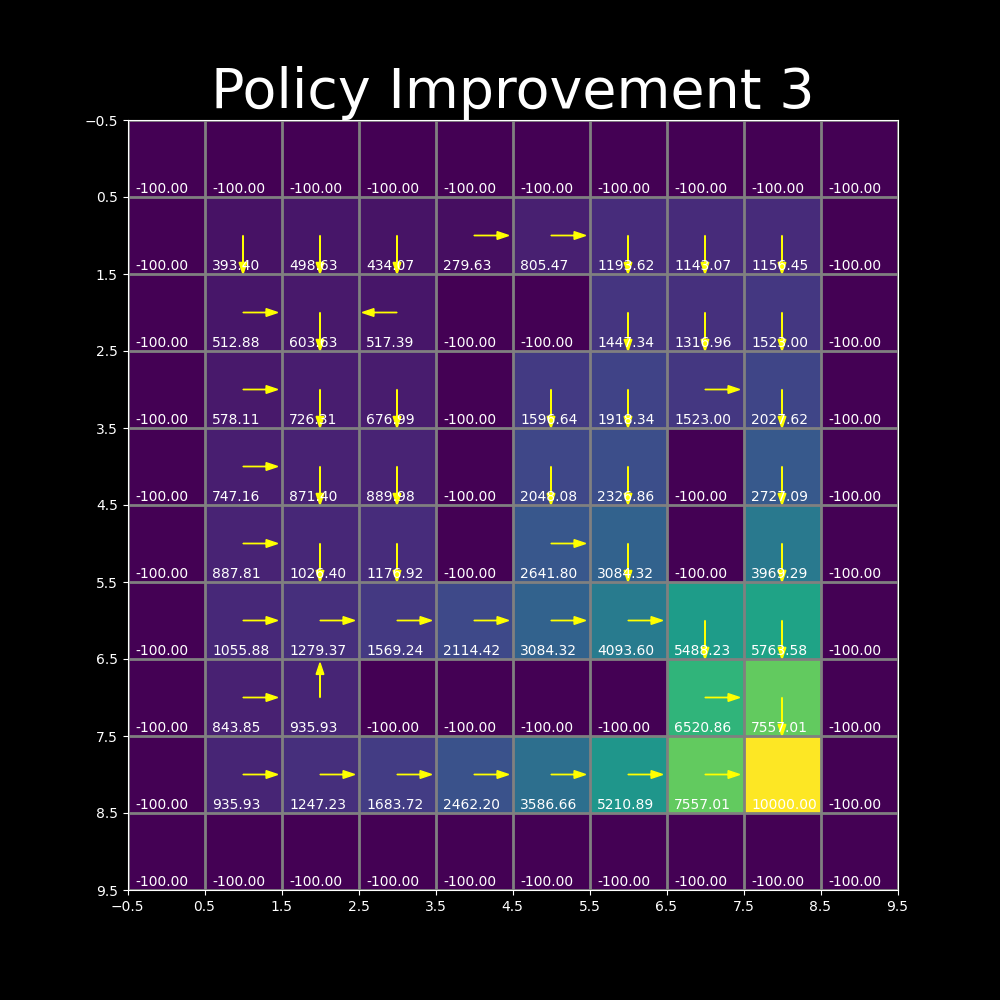

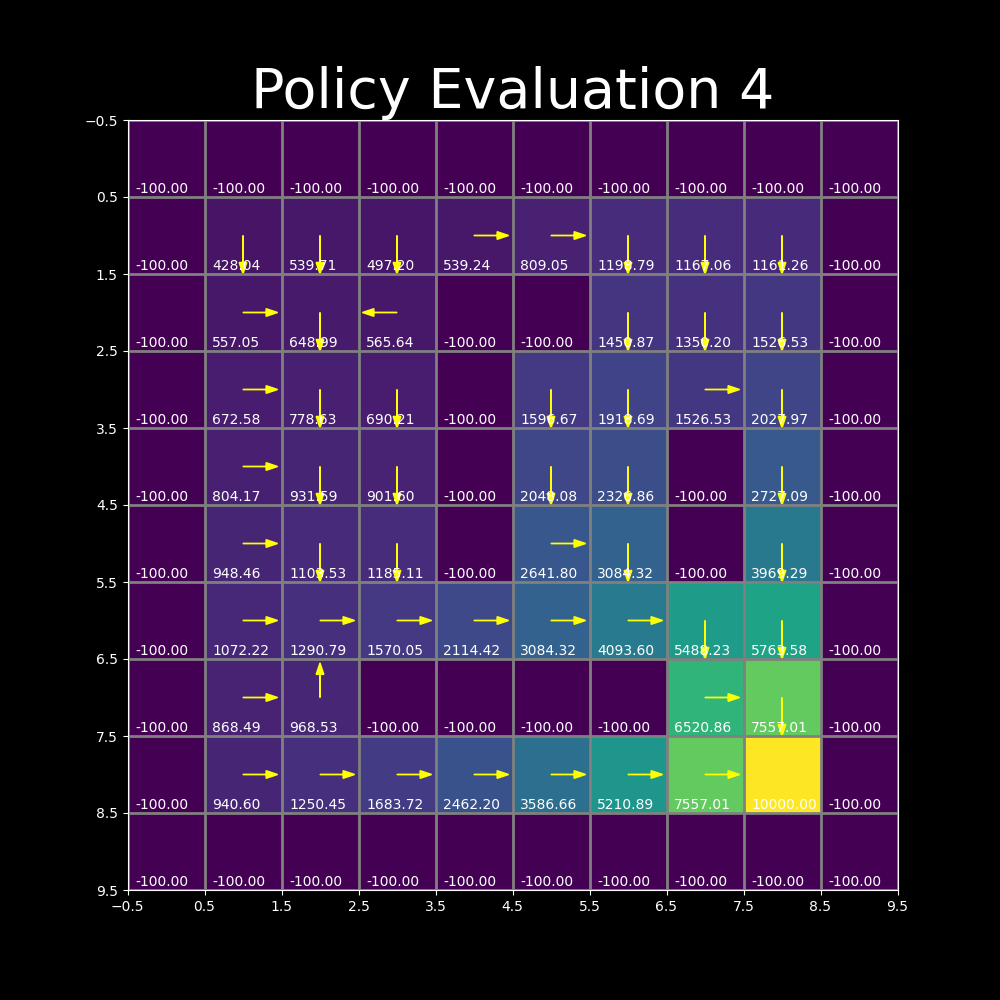

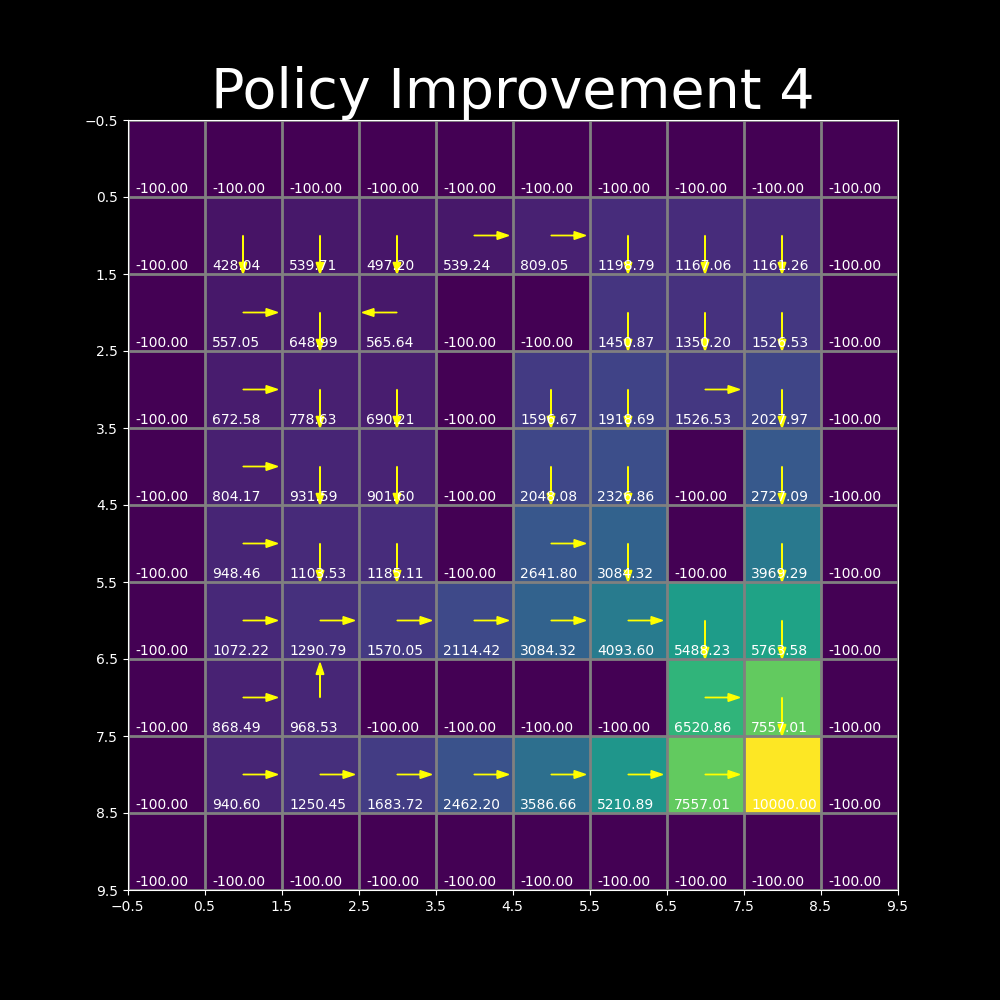

In [16]:
current_policy = get_hardcoded_policy('right', map, actions)
J_pi = np.zeros((10, 10))
updated_policy = np.zeros((10, 10))
num_iter = 0
prev_policy = current_policy

while np.all(prev_policy == updated_policy) == False:
    T = get_transition_matrix(current_policy)
    prev_policy = deepcopy(current_policy)
    cost_map = get_cost_matrix(map, current_policy)
    # Policy Evaluation
    J_pi = (np.linalg.inv(np.eye(100)-0.9*T) @
            (cost_map.flatten())).reshape(10, 10)
    plot_policy_png2(J_pi, current_policy,
                     f"Policy Evaluation {num_iter+1}", f"{num_iter}_{1}.png", title_fontsize=40)
    # Policy Improvement
    Q_factor = np.zeros((10, 10, 5))
    Q_factor[:, :, actions['up']] = (
        T_up @ (C_up + (0.9 * J_pi)).flatten()).reshape(10, 10)
    Q_factor[:, :, actions['down']] = (
        T_down @ (C_down + (0.9 * J_pi)).flatten()).reshape(10, 10)
    Q_factor[:, :, actions['left']] = (
        T_left @ (C_left + (0.9 * J_pi)).flatten()).reshape(10, 10)
    Q_factor[:, :, actions['right']] = (
        T_right @ (C_right + (0.9 * J_pi)).flatten()).reshape(10, 10)
    Q_factor[:, :, actions['nothing']] = (
        T_nothing @ (C_nothing + (0.9 * J_pi)).flatten()).reshape(10, 10)
    updated_policy = np.argmax(Q_factor[:, :, :4], axis=2)
    updated_policy[map == -10] = actions['nothing']
    updated_policy[-2, -2] = actions['nothing']
    current_policy = updated_policy
    plot_policy_png2(J_pi, current_policy,
                     f"Policy Improvement {num_iter+1}", f"J100_{num_iter}_{2}.png", title_fontsize=40)
    num_iter += 1

plot_policy(J_pi, current_policy)


In [17]:
import imageio


def create_gif(filenames, duration, fade_duration):
    images = []
    for i in range(len(filenames)):
        images.append(imageio.imread(filenames[i]))
        if i < len(filenames) - 1:
            next_image = imageio.imread(filenames[i + 1])
            for j in np.arange(0.0, 1.0, 1.0 / (fade_duration / duration)):
                images.append((1.0 - j) * images[-1] + j * next_image)
    imageio.mimsave('movie.gif', images, duration=duration)


In [19]:
filenames = [f"{i}_{j}.png" for i in range(7) for j in range(1, 3)]
create_gif(filenames, 0.5, 0.01)


C:\Users\aniru\AppData\Local\Temp\ipykernel_20948\2068132647.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filenames[i]))
C:\Users\aniru\AppData\Local\Temp\ipykernel_20948\2068132647.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  next_image = imageio.imread(filenames[i + 1])
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from fl